In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
import sklearn
from sklearn.preprocessing import Binarizer, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.datasets import make_classification 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [3]:
df = pd.read_csv("heart disease classification dataset.csv")

In [4]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df[df['trestbps'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
15,50,female,2,NaN,219.0,0,1,158.0,0,1.6,1,0,2,yes
50,51,female,2,NaN,256.0,0,0,149.0,0,0.5,2,0,2,yes
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [8]:
df[df['chol'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
261,52,male,0,112.0,NaN,0,1,160.0,0,0.0,2,1,2,no


In [9]:
df[df['thalach'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,48,male,2,124.0,255.0,1,1,NaN,0,0.0,2,2,2,yes
135,49,female,0,130.0,269.0,0,1,NaN,0,0.0,2,0,2,yes
177,64,male,2,140.0,335.0,0,1,NaN,0,0.0,2,0,2,no
216,62,female,2,130.0,263.0,0,1,NaN,0,1.2,1,1,3,no
297,59,male,0,164.0,176.0,1,0,NaN,0,1.0,1,2,1,no


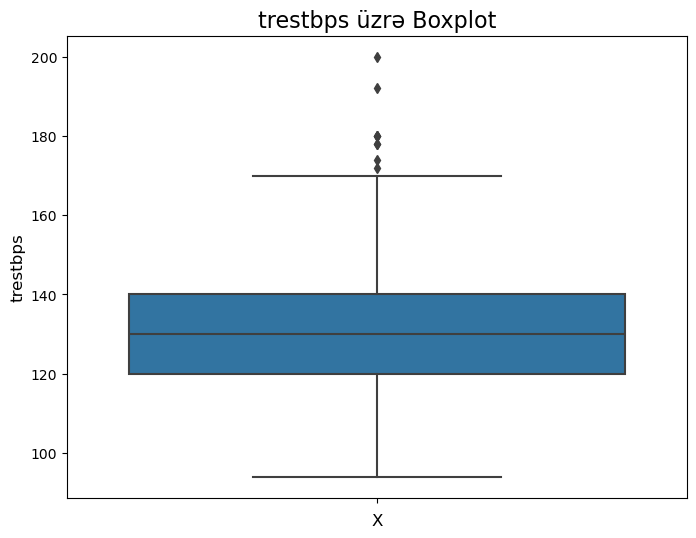

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='trestbps', data=df)

plt.title('trestbps üzrə Boxplot', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('trestbps', fontsize=12)
plt.show()

In [11]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


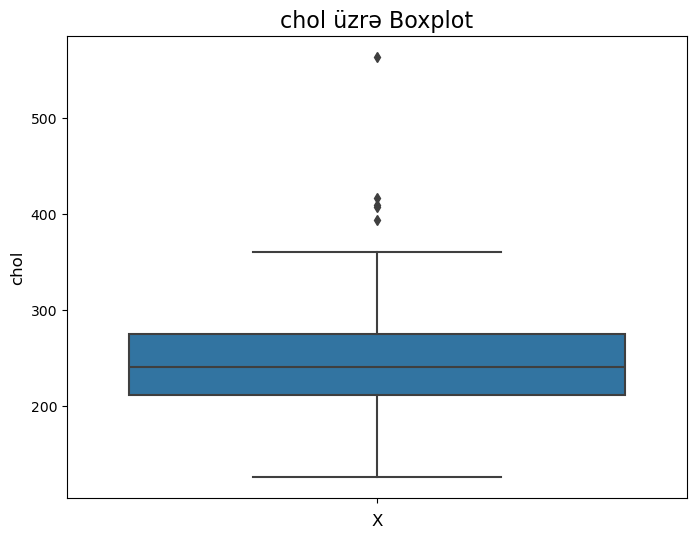

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='chol', data=df)

plt.title('chol üzrə Boxplot', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('chol', fontsize=12)
plt.show()

In [14]:
df['chol'] = df['chol'].fillna(df['chol'].median())

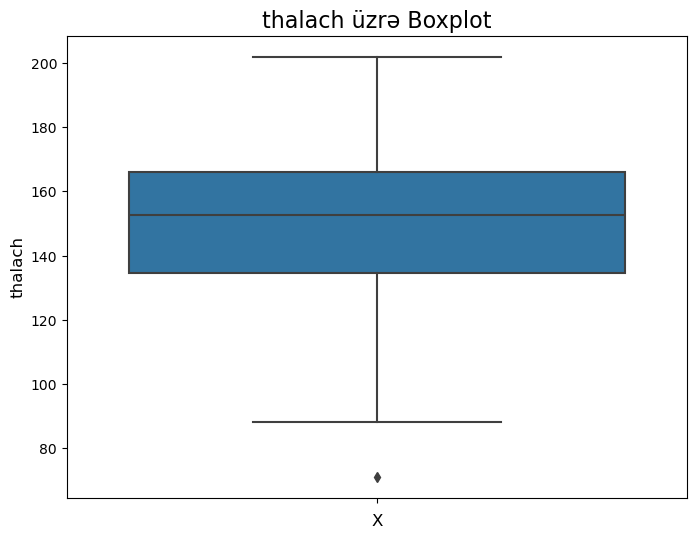

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='thalach', data=df)

plt.title('thalach üzrə Boxplot', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('thalach', fontsize=12)
plt.show()

In [16]:
df['thalach'].unique()

array([150., 187., 172., 178., 163., 148., 153., 173., 162., 174., 160.,
       139., 171., 144., 158., 114., 151., 161., 179., 137., 157., 123.,
       152., 168., 140., 188., 125., 170., 165., 142., 180., 143., 182.,
       156., 115., 149., 146., 175., 186., 185., 159., 130., 190., 132.,
       147., 154., 202., 166., 164., 184., 122.,  nan, 169., 138., 111.,
       145., 194., 131., 133., 155., 167., 192., 121.,  96., 126., 105.,
       181., 116., 108., 129., 120., 112., 128., 109., 113.,  99., 177.,
       141., 136., 127., 103., 124.,  88., 195., 106.,  95., 117.,  71.,
       118., 134.])

In [17]:
df['thalach'] = df['thalach'].fillna(df['thalach'].mean())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,130.0,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,no


In [20]:
df = pd.get_dummies(df, columns=['sex'], dtype = "int", drop_first = True)

In [21]:
df

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes,1
4,57,0,130.0,354.0,0,1,163.0,1,0.6,2,0,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no,0
299,45,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no,1
300,68,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no,1
301,57,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,no,1


In [22]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [23]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [24]:
df = pd.get_dummies(df, columns=['exang'], dtype = "int", drop_first = True)

In [25]:
df

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,sex_male,exang_1
0,63,3,145.0,233.0,1,0,150.0,2.3,0,0,1,yes,1,0
1,37,2,130.0,250.0,0,1,187.0,3.5,0,0,2,yes,1,0
2,41,1,130.0,204.0,0,0,172.0,1.4,2,0,2,yes,0,0
3,56,1,120.0,236.0,0,1,178.0,0.8,2,0,2,yes,1,0
4,57,0,130.0,354.0,0,1,163.0,0.6,2,0,2,yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241.0,0,1,123.0,0.2,1,0,3,no,0,1
299,45,3,110.0,264.0,0,1,132.0,1.2,1,0,3,no,1,0
300,68,0,144.0,193.0,1,1,141.0,3.4,1,2,3,no,1,0
301,57,0,130.0,131.0,0,1,115.0,1.2,1,1,3,no,1,1


In [26]:
df = pd.get_dummies(df, columns=['fbs'], dtype = "int", drop_first = True)

In [27]:
df

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target,sex_male,exang_1,fbs_1
0,63,3,145.0,233.0,0,150.0,2.3,0,0,1,yes,1,0,1
1,37,2,130.0,250.0,1,187.0,3.5,0,0,2,yes,1,0,0
2,41,1,130.0,204.0,0,172.0,1.4,2,0,2,yes,0,0,0
3,56,1,120.0,236.0,1,178.0,0.8,2,0,2,yes,1,0,0
4,57,0,130.0,354.0,1,163.0,0.6,2,0,2,yes,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,241.0,1,123.0,0.2,1,0,3,no,0,1,0
299,45,3,110.0,264.0,1,132.0,1.2,1,0,3,no,1,0,0
300,68,0,144.0,193.0,1,141.0,3.4,1,2,3,no,1,0,1
301,57,0,130.0,131.0,1,115.0,1.2,1,1,3,no,1,1,0


In [28]:
df['target'] = np.where(df['target'] == 'yes', 1, 0)

In [29]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

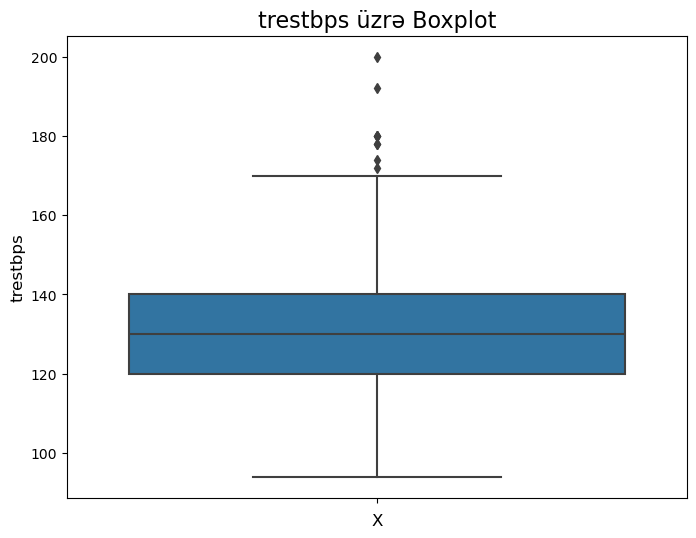

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='trestbps', data=df)

plt.title('trestbps üzrə Boxplot', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('trestbps', fontsize=12)
plt.show()

In [31]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

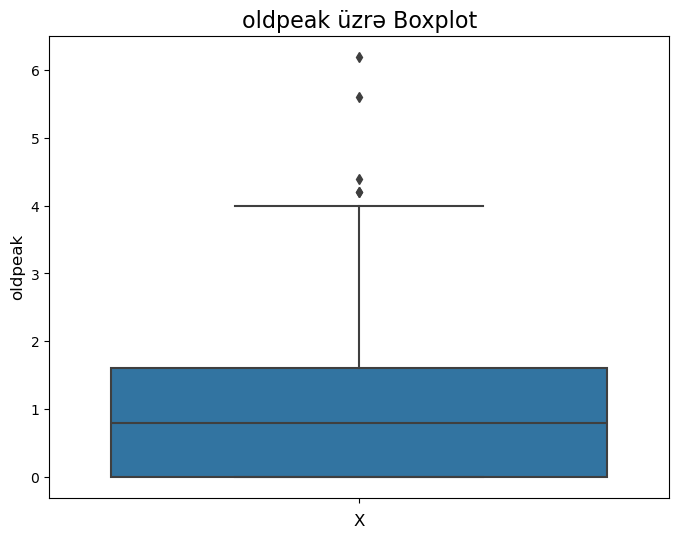

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='oldpeak', data=df)

plt.title('oldpeak üzrə Boxplot', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('oldpeak', fontsize=12)
plt.show()

In [33]:
X = df.drop(['target'], axis = 1) 
y = df['target']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [43]:
standard = StandardScaler()
minmax = MinMaxScaler()  

In [44]:
xtrain_scale = ['trestbps',	'chol', 'thalach', 'oldpeak']
X_train[xtrain_scale] = standard.fit_transform(X_train[xtrain_scale])

In [45]:
xtrain_scale = ['trestbps',	'chol', 'thalach', 'oldpeak']
X_train[xtrain_scale] = standard.transform(X_train[xtrain_scale])

In [46]:
X_train

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex_male,exang_1,fbs_1
124,39,2,-7.830419,-4.557786,1,-6.788765,-1.786205,2,0,2,0,0,0
72,29,1,-7.705111,-4.556101,0,-6.741227,-1.786205,2,0,2,1,0,0
15,50,2,-7.705111,-4.551045,1,-6.832169,-0.437269,1,0,2,0,0,0
10,54,0,-7.670304,-4.544303,1,-6.828035,-0.774503,2,0,2,1,0,0
163,38,2,-7.677265,-4.565876,1,-6.801166,-1.786205,2,4,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,2,-7.670304,-4.546326,1,-6.821835,-1.280354,1,1,3,1,0,0
71,51,2,-7.830419,-4.548348,1,-6.840437,-1.786205,2,1,3,1,1,0
106,69,3,-7.600688,-4.545988,0,-6.887975,-1.701896,1,1,2,1,0,1
270,46,0,-7.739919,-4.540932,0,-6.861105,-1.111737,2,0,3,1,0,0


# Logistic Regression

In [ ]:
# without scaler

In [36]:
logmodel = LogisticRegression(max_iter=900)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [39]:
result = pd.DataFrame(data = y_test.values, columns = ['Actual Value'])
result["Predicted Value"] = predictions
result

,Actual Value,Predicted Value
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
86,0,0
87,1,1
88,1,1
89,1,0


In [40]:
conf_matrix = confusion_matrix(result["Actual Value"], result["Predicted Value"])
print(conf_matrix)

[[33  8]
 [ 8 42]]


In [41]:
print(f'Accuracy: {accuracy_score(result["Actual Value"], result["Predicted Value"])}')
print(f'F1 score: {f1_score(result["Actual Value"], result["Predicted Value"])}')
print(f'Recall: {recall_score(result["Actual Value"], result["Predicted Value"])}')
print(f'Precision: {precision_score(result["Actual Value"], result["Predicted Value"])}')

Accuracy: 0.8241758241758241
F1 score: 0.8399999999999999
Recall: 0.84
Precision: 0.84


In [42]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [47]:
#Scaler etdikden sonra

In [53]:
logmodel = LogisticRegression(max_iter=900)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [56]:
result = pd.DataFrame(data = y_test.values, columns = ['Actual Value'])
result["Predicted Value"] = predictions
result

,Actual Value,Predicted Value
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
117,1,1
118,1,1
119,0,0
120,0,0


In [57]:
conf_matrix = confusion_matrix(result["Actual Value"], result["Predicted Value"])
print(conf_matrix)

[[43  9]
 [10 60]]


In [58]:
print(f'Accuracy: {accuracy_score(result["Actual Value"], result["Predicted Value"])}')
print(f'F1 score: {f1_score(result["Actual Value"], result["Predicted Value"])}')
print(f'Recall: {recall_score(result["Actual Value"], result["Predicted Value"])}')
print(f'Precision: {precision_score(result["Actual Value"], result["Predicted Value"])}')

Accuracy: 0.8442622950819673
F1 score: 0.8633093525179856
Recall: 0.8571428571428571
Precision: 0.8695652173913043


In [63]:
#SelectKBest istifade

In [62]:
select_k_best = SelectKBest(score_func=f_classif, k=5)

In [64]:
logmodel = LogisticRegression(max_iter=900)

In [65]:
pipeline = Pipeline([
    ('feature_selection', select_k_best),
    ('classification', logmodel)
])

In [66]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('feature_selection', SelectKBest(k=5)),
                ('classification', LogisticRegression(max_iter=900))])

In [67]:
y_pred = pipeline.predict(X_test)

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8032786885245902
Confusion Matrix:
 [[41 11]
 [13 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        52
           1       0.84      0.81      0.83        70

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122



# Naive  Bayes

In [69]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [70]:
predicted = NBmodel.predict(X_test)

In [71]:
predicted

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [72]:
predictions_proba = NBmodel.predict_proba(X_test)

In [73]:
predictions_proba

array([[9.95291496e-01, 4.70850389e-03],
       [1.49389346e-01, 8.50610654e-01],
       [2.09912997e-02, 9.79008700e-01],
       [9.99145857e-01, 8.54143162e-04],
       [8.32877744e-03, 9.91671223e-01],
       [1.32066407e-02, 9.86793359e-01],
       [3.94887252e-01, 6.05112748e-01],
       [9.99999995e-01, 4.64845077e-09],
       [9.99998677e-01, 1.32273373e-06],
       [1.80665769e-01, 8.19334231e-01],
       [1.75522519e-01, 8.24477481e-01],
       [9.99962626e-01, 3.73740357e-05],
       [7.37899030e-03, 9.92621010e-01],
       [9.98113800e-01, 1.88620046e-03],
       [9.74423109e-04, 9.99025577e-01],
       [2.06677142e-03, 9.97933229e-01],
       [2.59806584e-04, 9.99740193e-01],
       [9.86640474e-01, 1.33595259e-02],
       [9.99972005e-01, 2.79950045e-05],
       [9.99990793e-01, 9.20668561e-06],
       [2.09792880e-01, 7.90207120e-01],
       [9.99530904e-01, 4.69096346e-04],
       [9.85625669e-01, 1.43743313e-02],
       [3.19901535e-01, 6.80098465e-01],
       [7.301245

In [76]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [77]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)
print('Auc Score for Naive Bayes:',auc2 )

Confusion Matrix for Naive Bayes:
 [[44  8]
 [12 58]]
Accuracy Score for Naive Bayes: 0.8360655737704918
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.88      0.83      0.85        70

    accuracy                           0.84       122
   macro avg       0.83      0.84      0.83       122
weighted avg       0.84      0.84      0.84       122

Auc Score for Naive Bayes: 0.8373626373626374


# KNN 

In [78]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[32 20]
 [22 48]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        52
           1       0.71      0.69      0.70        70

    accuracy                           0.66       122
   macro avg       0.65      0.65      0.65       122
weighted avg       0.66      0.66      0.66       122



In [81]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[34 18]
 [26 44]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        52
           1       0.71      0.63      0.67        70

    accuracy                           0.64       122
   macro avg       0.64      0.64      0.64       122
weighted avg       0.65      0.64      0.64       122



In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [88]:
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy score: {cv_scores.mean()}')

Cross-validation accuracy scores: [0.63934426 0.57377049 0.50819672 0.66666667 0.65      ]
Mean accuracy score: 0.6075956284153005


In [89]:
knn.fit(X, y)
y_pred = knn.predict(X)

In [90]:
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy score for the KNN model: {accuracy}')

Accuracy score for the KNN model: 0.768976897689769


# Decision Tree

In [91]:
clf_1 = DecisionTreeClassifier(criterion="entropy")

In [92]:
clf_1 = clf_1.fit(X_train,y_train)
y_pred = clf_1.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8032786885245902


In [96]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        52
           1       0.86      0.79      0.82        70

    accuracy                           0.80       122
   macro avg       0.80      0.81      0.80       122
weighted avg       0.81      0.80      0.80       122



In [98]:
#GridSearch ile

In [99]:
dt = DecisionTreeClassifier()

In [100]:
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Ən yaxşı hiperparametrlər: ", grid_search.best_params_)

Ən yaxşı hiperparametrlər:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [105]:
best_params = {
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'log2'
}

In [106]:
dt_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

In [107]:
dt_best.fit(X, y)
y_pred = dt_best.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ən yaxşı modelin doğruluğu: {accuracy}")

Ən yaxşı modelin doğruluğu: 0.9240924092409241


In [108]:
#Random Search

In [109]:
dt = DecisionTreeClassifier()

In [114]:
param_dist = {
    'max_depth': randint(1, 20),           
    'min_samples_split': randint(2, 20),   
    'min_samples_leaf': randint(1, 20),    
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy'],     
    'splitter': ['best', 'random']     
}
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)
random_search.fit(X, y)
print("Best parameters found: ", random_search.best_params_)

C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'best'}


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

In [116]:
best_para = {
    'criterion': 'entropy', 
    'max_depth': 3, 
    'max_features': None, 
    'min_samples_leaf': 9, 
    'min_samples_split': 5, 
    'splitter': 'best'}

In [117]:
dt_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)

In [118]:
dt_best.fit(X, y)
y_pred = dt_best.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ən yaxşı modelin doğruluğu: {accuracy}")

Ən yaxşı modelin doğruluğu: 0.9372937293729373


In [119]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = None)

rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [120]:
y_pred = rf.predict(X_test)

In [121]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [122]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        52
           1       0.86      0.84      0.85        70

    accuracy                           0.83       122
   macro avg       0.82      0.83      0.82       122
weighted avg       0.83      0.83      0.83       122

